**Importamos las librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Cargamos nuestras bases de datos**

In [2]:
cg = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
dg = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
rg = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

**Recordemos que:**
- cg: Tabla de casos confirmados a nivel global.
- dg: Tabla de muertes a nivel global.
- rg: Tabla de recuperados a nivel global.

**Tal y como comentamos en la sección anterior, lo primero que haremos será eliminar las variables de 'Province/State', 'Lat' y 'Long':**

In [3]:
cg = cg.drop('Province/State', axis=1)
dg = dg.drop('Province/State', axis=1)
rg = rg.drop('Province/State', axis=1)

cg = cg.drop(['Lat','Long'], axis=1)
dg = dg.drop(['Lat','Long'], axis=1)
rg = rg.drop(['Lat','Long'], axis=1)

**¿Cuántos duplicados tenemos?:**

In [4]:
cg['Country/Region'].duplicated().sum()

88

In [5]:
dg['Country/Region'].duplicated().sum()

88

In [6]:
rg['Country/Region'].duplicated().sum()

73

**Nuestras bases quedaron con datos duplicados debido a que habían países que se encontraban subdivididos a nivel de Provincia o Estado. Primero, solucionaremos esta problemática agrupando la información a nivel de país.** 

**Posteriormente, procederemos a despivotar nuestras tablas, de modo tal que las columnas de fechas pasarán a ser filas. Esto nos facilitará las tareas de revisión y análisis:**

In [7]:
cg = cg.groupby('Country/Region').sum().reset_index()
dg = dg.groupby('Country/Region').sum().reset_index()
rg = rg.groupby('Country/Region').sum().reset_index()

In [8]:
cg_despivotada = pd.melt(cg, id_vars='Country/Region', var_name='Fecha', value_name='Confirmados acumulados')
cg_despivotada['Fecha'] = pd.to_datetime(cg_despivotada['Fecha'])

dg_despivotada = pd.melt(dg, id_vars='Country/Region', var_name='Fecha', value_name='Muertes acumuladas')
dg_despivotada['Fecha'] = pd.to_datetime(dg_despivotada['Fecha'])

rg_despivotada = pd.melt(rg, id_vars='Country/Region', var_name='Fecha', value_name='Recuperados acumulados')
rg_despivotada['Fecha'] = pd.to_datetime(rg_despivotada['Fecha'])

**Ahora bien, ¿Cómo se observa la estructura de nuestras tablas? ¿Se observa alguna anomalía?:** 

In [9]:
cg_despivotada

,Country/Region,Fecha,Confirmados acumulados
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
229738,West Bank and Gaza,2023-03-09,703228
229739,Winter Olympics 2022,2023-03-09,535
229740,Yemen,2023-03-09,11945
229741,Zambia,2023-03-09,343135


In [10]:
cg_despivotada['Confirmados acumulados'].describe()

count    2.297430e+05
mean     1.379412e+06
std      5.810423e+06
min      0.000000e+00
25%      3.831000e+03
50%      5.293300e+04
75%      4.995925e+05
max      1.038027e+08
Name: Confirmados acumulados, dtype: float64

In [11]:
dg_despivotada

,Country/Region,Fecha,Muertes acumuladas
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
229738,West Bank and Gaza,2023-03-09,5708
229739,Winter Olympics 2022,2023-03-09,0
229740,Yemen,2023-03-09,2159
229741,Zambia,2023-03-09,4057


In [12]:
dg_despivotada['Muertes acumuladas'].describe()

count    2.297430e+05
mean     1.923809e+04
std      7.592769e+04
min      0.000000e+00
25%      4.600000e+01
50%      7.860000e+02
75%      7.227000e+03
max      1.123836e+06
Name: Muertes acumuladas, dtype: float64

In [13]:
rg_despivotada

,Country/Region,Fecha,Recuperados acumulados
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
229738,West Bank and Gaza,2023-03-09,0
229739,Winter Olympics 2022,2023-03-09,0
229740,Yemen,2023-03-09,0
229741,Zambia,2023-03-09,0


In [14]:
rg_despivotada['Recuperados acumulados'].describe()

count    2.297430e+05
mean     1.022510e+05
std      8.201866e+05
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.721500e+03
max      3.097475e+07
Name: Recuperados acumulados, dtype: float64

**En 'rg_despivotada' encontramos un valor anómalo: El mínimo no puede ser -1, así que debemos identificar donde está el error:**

In [15]:
anomalo = rg_despivotada[rg_despivotada['Recuperados acumulados'] == -1]
anomalo

,Country/Region,Fecha,Recuperados acumulados
194155,United Kingdom,2022-09-13,-1
194356,United Kingdom,2022-09-14,-1
194557,United Kingdom,2022-09-15,-1
194758,United Kingdom,2022-09-16,-1
194959,United Kingdom,2022-09-17,-1
195160,United Kingdom,2022-09-18,-1
195361,United Kingdom,2022-09-19,-1
195562,United Kingdom,2022-09-20,-1


In [16]:
dia_anterior = rg_despivotada[(rg_despivotada['Fecha'] == "2022-09-12") & (rg_despivotada['Country/Region'] == 'United Kingdom')]
dia_anterior

,Country/Region,Fecha,Recuperados acumulados
193954,United Kingdom,2022-09-12,0


In [17]:
dia_posterior = rg_despivotada[(rg_despivotada['Fecha'] == "2022-09-21") & (rg_despivotada['Country/Region'] == 'United Kingdom')]
dia_posterior

,Country/Region,Fecha,Recuperados acumulados
195763,United Kingdom,2022-09-21,0


**Verificamos que no existen recuperados acumulados hasta la fecha, por lo que para los días anómalos el valor debiese ser 0. Simplemente reemplazaremos el dato:**

In [18]:
rg_despivotada = rg_despivotada.replace(-1,0)
rg_despivotada['Recuperados acumulados'].describe()

count    2.297430e+05
mean     1.022510e+05
std      8.201866e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.721500e+03
max      3.097475e+07
Name: Recuperados acumulados, dtype: float64

**¿Cómo se observa la imagen por país al último día registrado?:**

In [19]:
ultimo_dia_cg = cg_despivotada['Fecha'].max()
df_ultimo_dia_cg = cg_despivotada[cg_despivotada['Fecha'] == ultimo_dia_cg]

ultimo_dia_dg = dg_despivotada['Fecha'].max()
df_ultimo_dia_dg = dg_despivotada[dg_despivotada['Fecha'] == ultimo_dia_dg]

ultimo_dia_rg = rg_despivotada['Fecha'].max()
df_ultimo_dia_rg = rg_despivotada[rg_despivotada['Fecha'] == ultimo_dia_rg]

In [20]:
cg_ud = df_ultimo_dia_cg.sort_values(by='Confirmados acumulados', ascending=False)
cg_ud

,Country/Region,Fecha,Confirmados acumulados
229728,US,2023-03-09,103802702
229622,India,2023-03-09,44690738
229605,France,2023-03-09,39866718
229609,Germany,2023-03-09,38249060
229566,Brazil,2023-03-09,37076053
...,...,...,...
229739,Winter Olympics 2022,2023-03-09,535
229618,Holy See,2023-03-09,29
229547,Antarctica,2023-03-09,11
229649,MS Zaandam,2023-03-09,9


<AxesSubplot:xlabel='Confirmados acumulados', ylabel='Country/Region'>

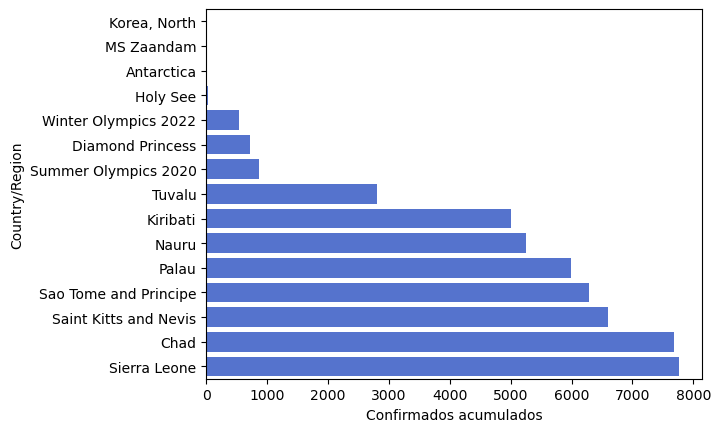

In [21]:
sns.barplot(data=cg_ud.tail(15).sort_values(by='Confirmados acumulados', ascending=True), x='Confirmados acumulados', y='Country/Region',color='royalblue')

<AxesSubplot:xlabel='Confirmados acumulados', ylabel='Country/Region'>

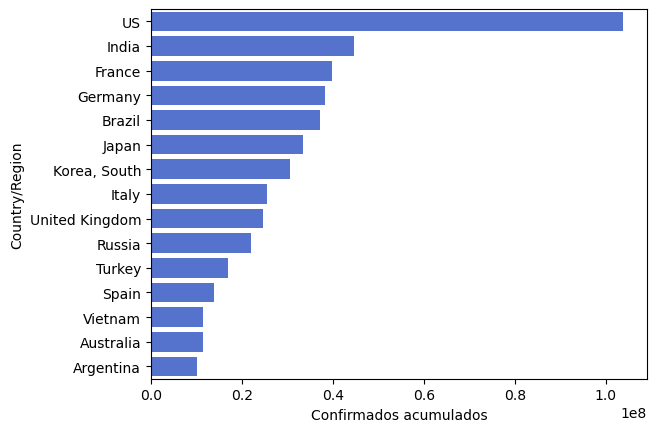

In [22]:
sns.barplot(data=cg_ud.head(15), x='Confirmados acumulados', y='Country/Region',color='royalblue')

In [23]:
dg_ud = df_ultimo_dia_dg.sort_values(by='Muertes acumuladas', ascending=False)
dg_ud

,Country/Region,Fecha,Muertes acumuladas
229728,US,2023-03-09,1123836
229566,Brazil,2023-03-09,699276
229622,India,2023-03-09,530779
229689,Russia,2023-03-09,388478
229659,Mexico,2023-03-09,333188
...,...,...,...
229712,Summer Olympics 2020,2023-03-09,0
229739,Winter Olympics 2022,2023-03-09,0
229547,Antarctica,2023-03-09,0
229727,Tuvalu,2023-03-09,0


<AxesSubplot:xlabel='Muertes acumuladas', ylabel='Country/Region'>

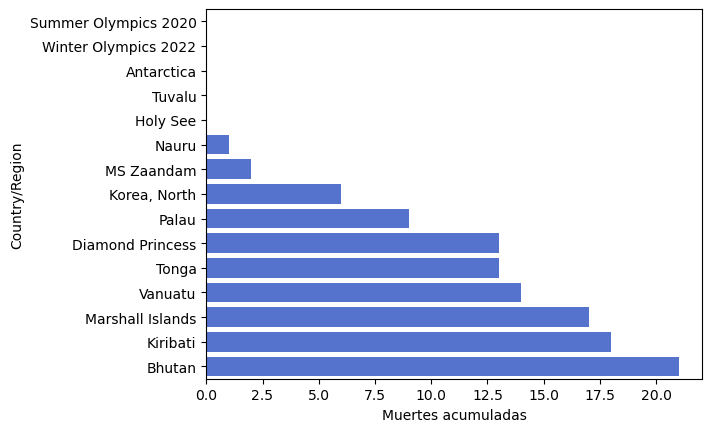

In [24]:
sns.barplot(data=dg_ud.tail(15).sort_values(by='Muertes acumuladas', ascending=True), x='Muertes acumuladas', y='Country/Region',color='royalblue')

<AxesSubplot:xlabel='Muertes acumuladas', ylabel='Country/Region'>

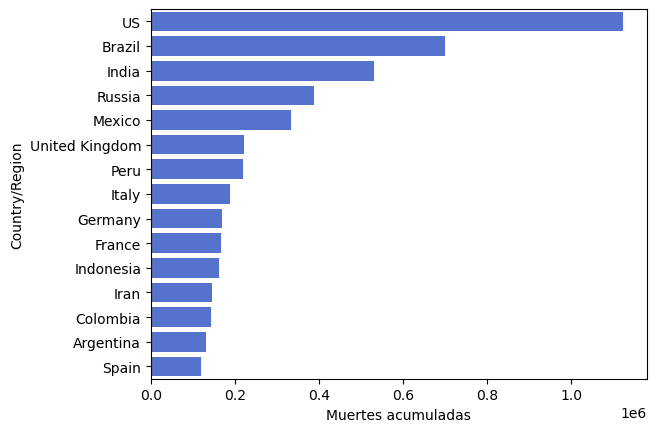

In [25]:
sns.barplot(data=dg_ud.head(15), x='Muertes acumuladas', y='Country/Region',color='royalblue')

In [26]:
df_ultimo_dia_rg.sort_values(by='Recuperados acumulados', ascending=False)

,Country/Region,Fecha,Recuperados acumulados
229542,Afghanistan,2023-03-09,0
229680,Panama,2023-03-09,0
229670,Netherlands,2023-03-09,0
229671,New Zealand,2023-03-09,0
229672,Nicaragua,2023-03-09,0
...,...,...,...
229612,Grenada,2023-03-09,0
229613,Guatemala,2023-03-09,0
229614,Guinea,2023-03-09,0
229615,Guinea-Bissau,2023-03-09,0


**Observamos un grave problema que no fue detectado anteriormente: La base de datos para el día 2023-03-09 no encuentra el volumen de recuperados acumulados.
Es altamente probable que en algún momento no se hayan guardado más registros, por lo que tenemos que buscar en qué momento se dejó de registrar esta cifra. Esto podemos lograrlo identificando la distribución por fecha.**

- Adicionalmente, en las bases detectamos que hay países que no corresponden a países como tal (Ej. Winter Olympics 2022), pero es más fácil descartarlos luego de unificar las bases. 

In [27]:
rg_agrupada = rg_despivotada.groupby('Fecha')['Recuperados acumulados'].sum().reset_index()
rg_agrupada

,Fecha,Recuperados acumulados
0,2020-01-22,30
1,2020-01-23,32
2,2020-01-24,39
3,2020-01-25,42
4,2020-01-26,56
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


In [28]:
maximo = rg_agrupada['Recuperados acumulados'].max()
maximo

130899061

In [29]:
rg_agrupada[rg_agrupada['Recuperados acumulados'] == maximo]

,Fecha,Recuperados acumulados
560,2021-08-04,130899061


In [30]:
rg_agrupada[(rg_agrupada['Fecha'] > "2021-08-01") & (rg_agrupada['Fecha'] < "2021-08-10")]

,Fecha,Recuperados acumulados
558,2021-08-02,130277533
559,2021-08-03,130582001
560,2021-08-04,130899061
561,2021-08-05,0
562,2021-08-06,0
563,2021-08-07,0
564,2021-08-08,0
565,2021-08-09,0


<AxesSubplot:xlabel='Fecha', ylabel='Recuperados acumulados'>

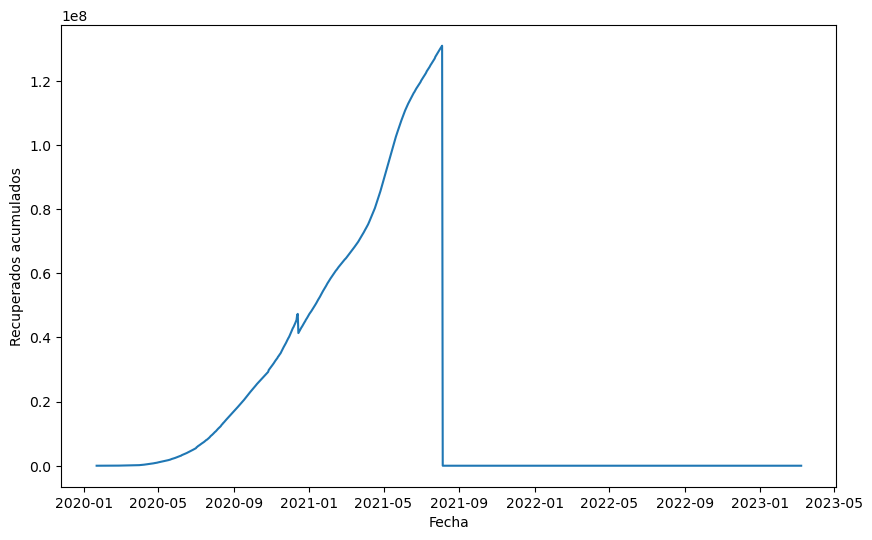

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rg_agrupada, x='Fecha', y='Recuperados acumulados', linestyle='-')

**Identificamos que a partir del 2021-08-04 se dejó de registrar información para los casos recuperados. Lamentablemente esto supera lo que un analista puede hacer por su cuenta, dado que hay un claro problema en la forma de registrar la data. Lo que haremos posteriormente será, al menos, mantener la información de la data acumulada para los días posteriores al 2021-08-04. Sin embargo, será mucho más fácil hacerlo a través de la sumatoria de los casos diarios que añadiremos como variable.**

**Ahora procederemos a consolidar las bases en una sola tabla:**

In [32]:
df = pd.merge(cg_despivotada, dg_despivotada, on=['Fecha','Country/Region'], how='outer')
df

,Country/Region,Fecha,Confirmados acumulados,Muertes acumuladas
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
229738,West Bank and Gaza,2023-03-09,703228,5708
229739,Winter Olympics 2022,2023-03-09,535,0
229740,Yemen,2023-03-09,11945,2159
229741,Zambia,2023-03-09,343135,4057


In [33]:
df = pd.merge(df, rg_despivotada, on=['Fecha','Country/Region'], how='outer')
df

,Country/Region,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
...,...,...,...,...,...
229738,West Bank and Gaza,2023-03-09,703228,5708,0
229739,Winter Olympics 2022,2023-03-09,535,0,0
229740,Yemen,2023-03-09,11945,2159,0
229741,Zambia,2023-03-09,343135,4057,0


**Eliminamos los casos que no son países, tal y como mencionamos anteriormente:**

In [34]:
df = df[~df['Country/Region'].str.contains('Olympics')]
df = df[~df['Country/Region'].str.contains('MS Zaandam')]
df = df[~df['Country/Region'].str.contains('Diamond Princess')]
df

,Country/Region,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
...,...,...,...,...,...
229737,Vietnam,2023-03-09,11526994,43186,0
229738,West Bank and Gaza,2023-03-09,703228,5708,0
229740,Yemen,2023-03-09,11945,2159,0
229741,Zambia,2023-03-09,343135,4057,0


**Renombramos la variable 'Country/Region' a 'País':**

In [35]:
df = df.rename(columns={'Country/Region': 'País'})
df

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
...,...,...,...,...,...
229737,Vietnam,2023-03-09,11526994,43186,0
229738,West Bank and Gaza,2023-03-09,703228,5708,0
229740,Yemen,2023-03-09,11945,2159,0
229741,Zambia,2023-03-09,343135,4057,0


**Siguientes pasos: ¿Qué necesitamos hacer?**

1. Necesitamos agregar nuevas variables de utilidad, como nuevos confirmados diarios, nuevas muertes diarias y recuperados nuevos diarios.

2. Es vital continuar observando la calidad de nuestros datos a partir de las nuevas variables generadas. 

3. Finalmente, debemos tomar decisiones sobre el manejo de información a partir de su fiabilidad. 

**Guardamos nuestra base:**

In [36]:
df.to_csv('covid_global.csv', index=False)